In [ ]:
import math
import numpy as np
from scipy import stats
#import sympy as smp
from pynverse import inversefunc
import pandas as pd
# from sympy.abc import t, a, b, c, d, e


from Fernando_package import plot_funcs
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import seaborn as sns


In [ ]:
#importing the dataframe and taking a look at it
df_microbial_growth = pd.read_csv('../data/modified_Susman18_physical_units.csv')
df_microbial_growth


,div_and_fold,fold_growth,division_ratio,added_length,generationtime,length_birth,length_final,growth_rate,lineage_ID,generation,start_time,end_time
0,NaN,1.170561,NaN,3.983777,0.750000,1.791428,5.775204,1.560748,15.0,0.0,0.250000,1.000000
1,1.009831,0.794984,0.456028,3.198324,0.500000,2.633655,5.831979,1.589968,15.0,1.0,1.083333,1.583333
2,0.862482,0.607893,0.469619,2.291172,0.416667,2.738808,5.029980,1.458944,15.0,2.0,1.666667,2.083333
3,1.426486,1.037370,0.505526,4.632409,0.833333,2.542786,7.175195,1.244844,15.0,3.0,2.166667,3.000000
4,0.729601,0.490156,0.446903,2.028413,0.333333,3.206619,5.235033,1.470468,15.0,4.0,3.083333,3.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.940427,0.590789,0.520893,2.192641,0.416667,2.722385,4.915026,1.417893,15.0,249.0,150.583333,151.000000
248,0.928602,0.604227,0.507478,2.069835,0.500000,2.494268,4.564104,1.208453,15.0,250.0,151.083333,151.583333
249,1.568073,1.046815,0.550478,4.644408,0.750000,2.512440,7.156848,1.395754,15.0,251.0,151.666667,152.416667
250,0.809727,0.481681,0.500204,2.215210,0.333333,3.579885,5.795095,1.445043,15.0,252.0,152.500000,152.833333


In [ ]:
#Creating two lists with the rounded values of generation times due to precision problems
#later in the code
tmp = pd.DataFrame(np.array(df_microbial_growth[['generationtime', 'length_final']]))
times = []
length = []
for i in tmp.iloc[:,0]:
    times.append(round(float(i),2))




In [ ]:
#Taking a look at the most present inter-division times 

tmp = pd.DataFrame(dict(times = times, length = df_microbial_growth['length_final']), columns = ['times', 'length'])

count_df = tmp.groupby(by='times').count().sort_values(by='length', ascending=False)
count_df.columns=['Counts']
count_df

,Counts
times,
0.50,68
0.58,61
0.42,47
0.67,29
0.33,16
0.75,13
0.17,5
0.25,5
0.08,2


In [ ]:
#Defining the function for the fit

def func_fit(x, x0, sigma):
    
    arg = np.log(x/(x0))/(2*sigma**2)
    return 1/2  * (1-scp.special.erf(arg))

In [ ]:
 count_df.index

Float64Index([ 0.5, 0.58, 0.42, 0.67, 0.33, 0.75, 0.17, 0.25, 0.08, 0.83, 0.92,
               1.0, 1.08, 1.33],
             dtype='float64', name='times')

In [ ]:
np.sort(count_df.index[:4])

array([0.42, 0.5 , 0.58, 0.67])

<ipython-input-5-85fca6430cd6>:5: RuntimeWarning: invalid value encountered in log
  arg = np.log(x/(x0))/(2*sigma**2)
<ipython-input-5-85fca6430cd6>:5: RuntimeWarning: invalid value encountered in log
  arg = np.log(x/(x0))/(2*sigma**2)
<ipython-input-5-85fca6430cd6>:5: RuntimeWarning: invalid value encountered in log
  arg = np.log(x/(x0))/(2*sigma**2)
<ipython-input-5-85fca6430cd6>:5: RuntimeWarning: invalid value encountered in log
  arg = np.log(x/(x0))/(2*sigma**2)


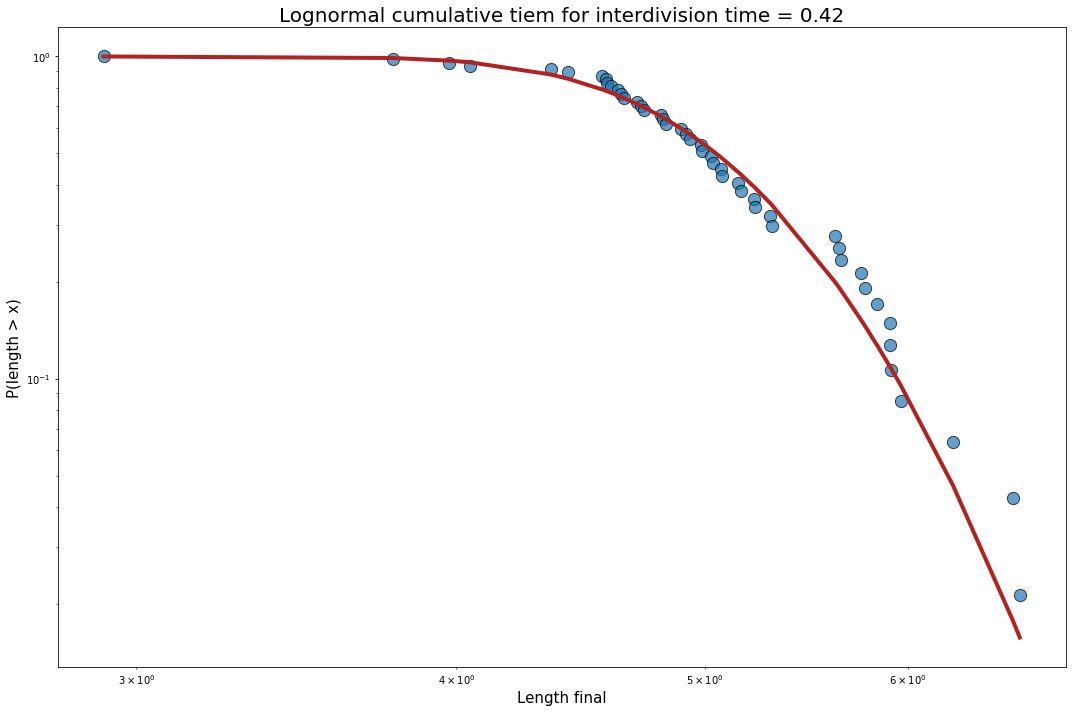

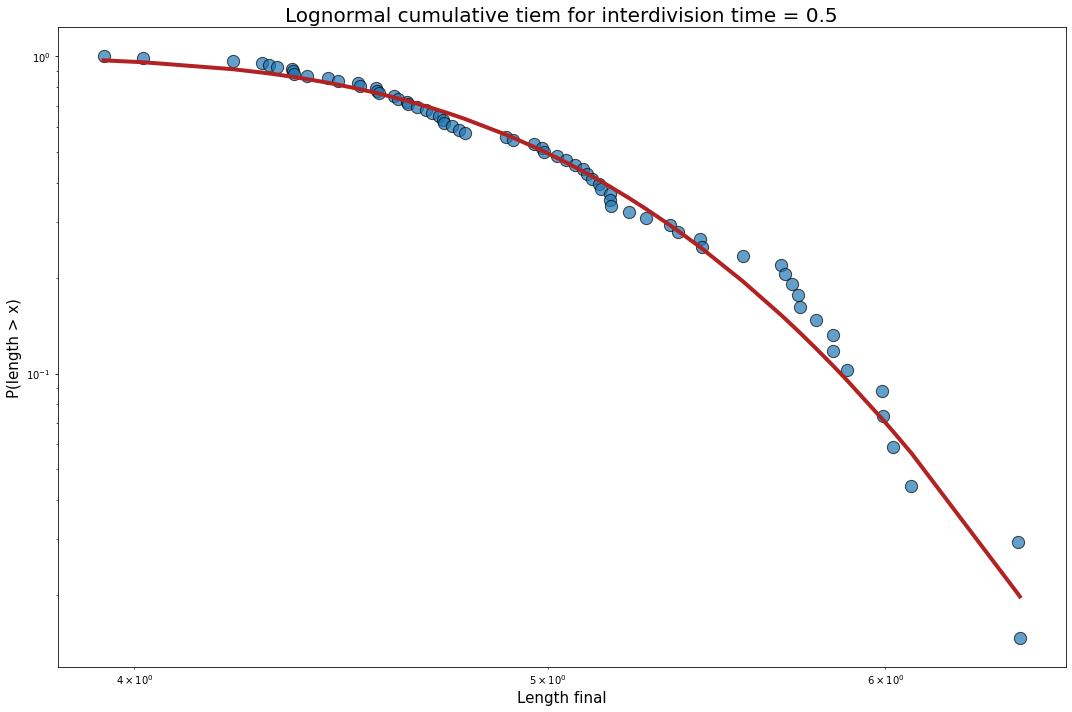

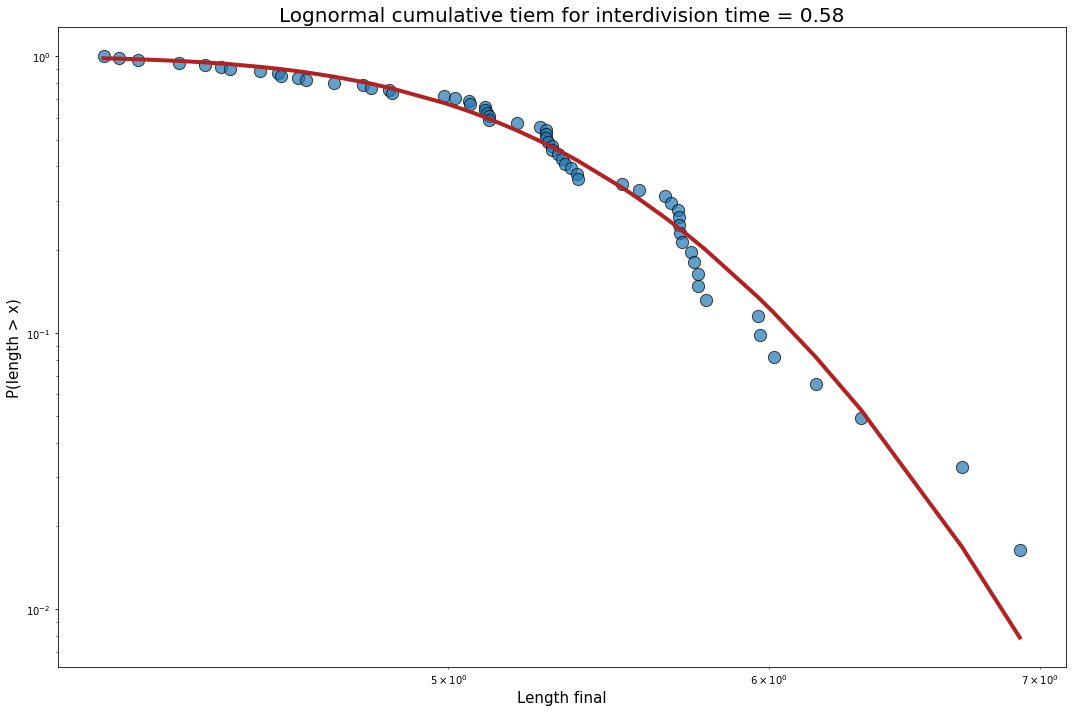

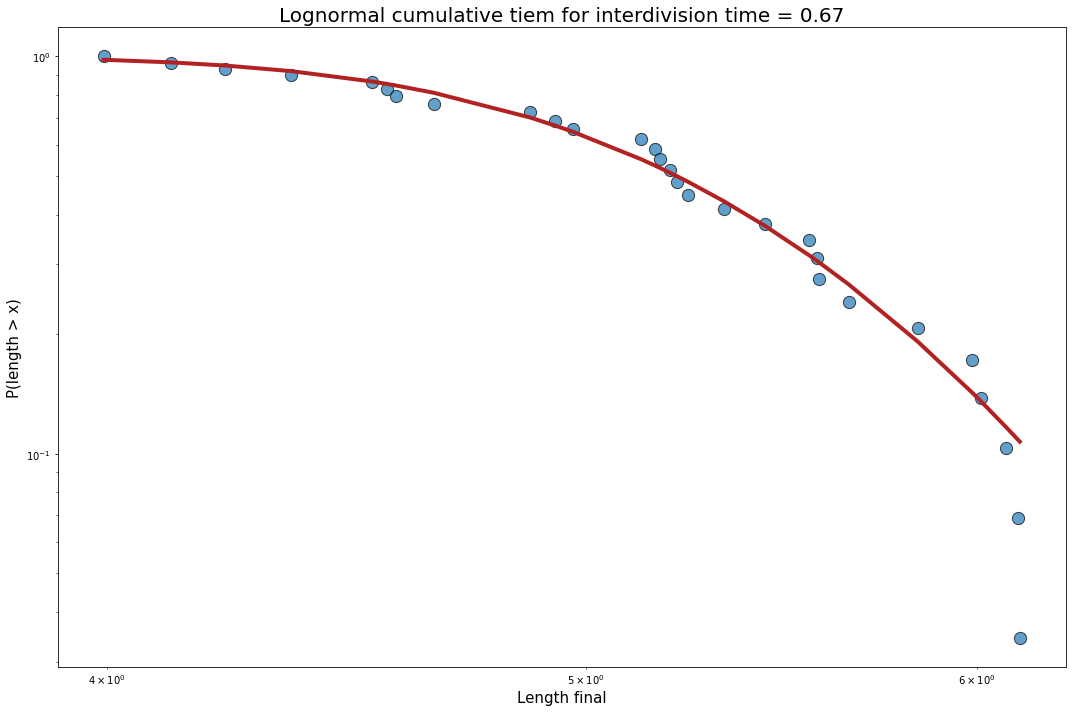

In [ ]:
x0s_sigmas = np.empty((4, 2))
for i, time in  enumerate(np.sort(count_df.index[:4])):
    y = tmp[tmp['times']==time]['length']
    fig, ax, cumul, array = plot_funcs.cumulative(y)
    popt, pcov = scp.optimize.curve_fit(func_fit, xdata=array, ydata = cumul)
    x0s_sigmas[i,:] = [popt[0], popt[1]]
    ax.plot(array, func_fit(array, popt[0], popt[1]), color='firebrick', linewidth=4)
    ax.set_title(f'Lognormal cumulative tiem for interdivision time = {time}', fontsize=20)
    ax.set_xlabel('Length final', fontsize=15)
    ax.set_ylabel('P(length > x)', fontsize=15)
    fig.tight_layout()

In [ ]:
display(pd.DataFrame(x0s_sigmas, columns=['x0', 'sigma']))

,x0,sigma
0,5.051241,0.299573
1,4.992123,0.296885
2,5.258748,0.283755
3,5.216800,-0.301758


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52dba48d-3798-4665-95fc-01a96804955b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>